## Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

##  Loading dataset

In [2]:
# Load your dataset
df = pd.read_csv('../data/benin-malanville.csv', parse_dates=['Timestamp'])

# Overview
print("Dataset shape:", df.shape)

Dataset shape: (525600, 19)


In [3]:
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
            Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0 2021-10-25 00:01:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1 2021-10-25 00:02:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2 2021-10-25 00:03:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3 2021-10-25 00:04:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4 2021-10-25 00:05:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4      

In [3]:
print("\nLast 5 rows:")
print(df.tail())


Last 5 rows:
                 Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  \
525595 2022-08-08 23:56:00 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3   
525596 2022-08-08 23:57:00 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2   
525597 2022-08-08 23:58:00 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6   
525598 2022-08-08 23:59:00 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9   
525599 2022-08-09 00:00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2   

        WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
525595     1.1      0.5  119.3      4.1  996         0            0.0   23.5   
525596     0.7      0.4  115.2      2.3  996         0            0.0   23.5   
525597     1.1      0.5  129.8      3.4  996         0            0.0   23.5   
525598     1.3      0.5  124.4      4.3  996         0            0.0   23.5   
525599     1.6      0.3  124.1      5.9  996         0            0.0   23.5   

        TModB  Comments  
525595   22.9       NaN  
525596  

In [4]:
print("An overview of the dataset: a random sample of 5 rows")
df.sample(5)

An overview of the dataset: a random sample of 5 rows


Timestamp    GHI    DNI    DHI   ModA   ModB  Tamb    RH  \
404006 2022-05-16 13:27:00  927.0  507.2  420.7  832.0  824.0  36.9  39.5   
200019 2021-12-25 21:40:00   -5.2   -0.8   -7.2    0.0    0.0  23.9  34.1   
289437 2022-02-25 23:58:00   -6.8   -1.1   -8.6    0.0    0.0  23.0  24.8   
388738 2022-05-05 22:59:00   -5.1   -0.5   -5.2    0.0    0.0  32.7  44.4   
208062 2021-12-31 11:43:00  838.0  866.0  143.5  933.9  936.0  29.4  16.6   

         WS  WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  \
404006  2.6     3.1      0.5  101.7      8.4  995         0            0.0   
200019  1.0     1.3      0.4   35.2      7.1  996         0            0.0   
289437  0.1     0.7      0.3   68.8      0.0  995         0            0.0   
388738  1.6     2.1      0.4  212.6      7.1  994         0            0.0   
208062  3.4     4.4      0.6   86.2     14.2  998         0            0.0   

        TModA  TModB  Comments  
404006   69.7   56.1       NaN  
200019   20.7   20.5       NaN  
289437   20.2   19.5       NaN  
388738   31.4   30.8       NaN  
208062   53.9   42.1       NaN

In [5]:
print("An overview of the dataset: the shape of the dataset")
print(df.info())

An overview of the dataset: the shape of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14 

# 1. Summary Statistics & Missing-Value Report

In [6]:
# Summary statistics
df.describe(include='all')

# Missing value report
missing = df.isna().sum()
missing_percent = df.isna().mean() * 100
print("Columns with >5% missing values:")
print(missing_percent[missing_percent > 5])

Columns with >5% missing values:
Comments    100.0
dtype: float64


In [7]:
print("Check for missing values:")
print(df.isna().sum())

Check for missing values:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [8]:
df.drop(columns=['Comments'], inplace=True)
#drop the Comments column


## Outlier Detection & Basic Cleaning

In [9]:
# Check missing values again (sanity check) after removal of comment
df.isna().sum()

Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64

In [10]:
# Compute Z-scores for Outlier Detection
# compute Z-scores for numerical columns to identify outliers.
# Any data point with |Z| > 3 will be considered an outlier.
# Columns to check for outliers
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores
z_scores = np.abs(stats.zscore(df[cols_to_check]))

# Flag rows with any |Z| > 3
outliers = (z_scores > 3).any(axis=1)

print(f"Number of outliers detected: {outliers.sum()} rows")

Number of outliers detected: 7740 rows


In [11]:
# Show all outlier rows
df_outliers = df[outliers]
df_outliers.head()


Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
670 2021-08-09 11:11:00   836.0  235.0  610.6   778.8   783.8  30.3  68.2   
671 2021-08-09 11:12:00  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6   
672 2021-08-09 11:13:00   938.0  340.1  612.8   891.1   891.1  30.4  68.4   
673 2021-08-09 11:14:00   718.5  126.8  593.2   682.6   682.6  30.6  68.2   
674 2021-08-09 11:15:00  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1   

      WS  WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  \
670  3.2     4.1      0.7  190.5     18.4  999         0            0.0   
671  3.4     4.1      0.6  175.8     13.3  999         0            0.0   
672  3.4     4.6      0.9  171.5     11.9  999         0            0.0   
673  4.7     5.6      0.6  160.7      8.0  999         0            0.0   
674  4.0     4.6      0.4  169.1     12.3  999         0            0.0   

     TModA  TModB  
670   63.0   52.7  
671   63.7   53.1  
672   65.8   54.3  
673   65.4   54.2  
674   65.0   53.5

##### handle negatives before Z-score

In [12]:
#Since negative irradiance (GHI, DNI, DHI) is physically impossible, you should correct those first.
irradiance_cols = ['GHI', 'DNI', 'DHI']

# Count negative values before fixing
for col in irradiance_cols:
    neg_count = (df[col] < 0).sum()
    percent = (neg_count / len(df)) * 100
    print(f"{col}: {neg_count} negative values ({percent:.2f}%)")

# Fix negatives by setting them to 0
df[irradiance_cols] = df[irradiance_cols].clip(lower=0)


GHI: 258847 negative values (49.25%)
DNI: 275987 negative values (52.51%)
DHI: 259182 negative values (49.31%)


In [13]:
df[irradiance_cols] = df[irradiance_cols].clip(lower=0)

In [14]:
for col in irradiance_cols:
    neg_count = (df[col] < 0).sum()
    print(f"{col}: {neg_count} negative values remaining")

GHI: 0 negative values remaining
DNI: 0 negative values remaining
DHI: 0 negative values remaining


In [16]:
df[irradiance_cols].min()

GHI    0.0
DNI    0.0
DHI    0.0
dtype: float64

#### Then apply Z-score for statistical outliers

In [17]:
#Once negatives are fixed, we can safely compute Z-scores for high outliers only
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = np.abs(stats.zscore(df[cols]))
outliers = (z_scores > 3).any(axis=1)

print(f"Number of outlier rows detected: {outliers.sum()}")

Number of outlier rows detected: 7893


#### Drop or Impute (Median) Missing Values in Key Columns

In [17]:
# Check missing values in key columns
#print(df[key_cols].isna().sum())

In [18]:
# List of key numeric columns to check
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust', 
            'Tamb', 'RH', 'BP', 'Precipitation', 'TModA', 'TModB']

# Fill missing numeric values with median of each column
for col in key_cols:
    if df[col].isna().sum() > 0:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
        print(f"Filled missing values in {col} with median: {median_value}")


##### Export Cleaned DataFrame

In [21]:
import os

# Create data directory at the same level as notebooks/
os.makedirs("../data", exist_ok=True)

# Export cleaned CSV
df.to_csv("../data/benin_clean.csv", index=False)

print("✅ Cleaned dataset saved to: ../data/benin_clean.csv")


✅ Cleaned dataset saved to: ../data/benin_clean.csv


# Time Series Analysis

##### Load cleaned data

In [22]:
# improve plot aesthetics
sns.set(style="whitegrid", context="talk")

df = pd.read_csv("../data/benin_clean.csv", parse_dates=['Timestamp'])
df.set_index('Timestamp', inplace=True)  # makes plotting by time easier
df.head()

GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
Timestamp                                                                 
2021-08-09 00:01:00  0.0  0.0  0.0   0.0   0.0  26.2  93.4  0.0     0.4   
2021-08-09 00:02:00  0.0  0.0  0.0   0.0   0.0  26.2  93.6  0.0     0.0   
2021-08-09 00:03:00  0.0  0.0  0.0   0.0   0.0  26.2  93.7  0.3     1.1   
2021-08-09 00:04:00  0.0  0.0  0.0   0.0   0.0  26.2  93.3  0.2     0.7   
2021-08-09 00:05:00  0.0  0.0  0.0   0.0   0.0  26.2  93.3  0.1     0.7   

                     WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  \
Timestamp                                                                    
2021-08-09 00:01:00      0.1  122.1      0.0  998         0            0.0   
2021-08-09 00:02:00      0.0    0.0      0.0  998         0            0.0   
2021-08-09 00:03:00      0.5  124.6      1.5  997         0            0.0   
2021-08-09 00:04:00      0.4  120.3      1.3  997         0            0.0   
2021-08-09 00:05:00      0.3  113.2      1.0  997         0            0.0   

                     TModA  TModB  
Timestamp                          
2021-08-09 00:01:00   26.3   26.2  
2021-08-09 00:02:00   26.3   26.2  
2021-08-09 00:03:00   26.4   26.2  
2021-08-09 00:04:00   26.4   26.3  
2021-08-09 00:05:00   26.4   26.3

##### Line Plots of Key Variables GHI, DNI, DHI over time

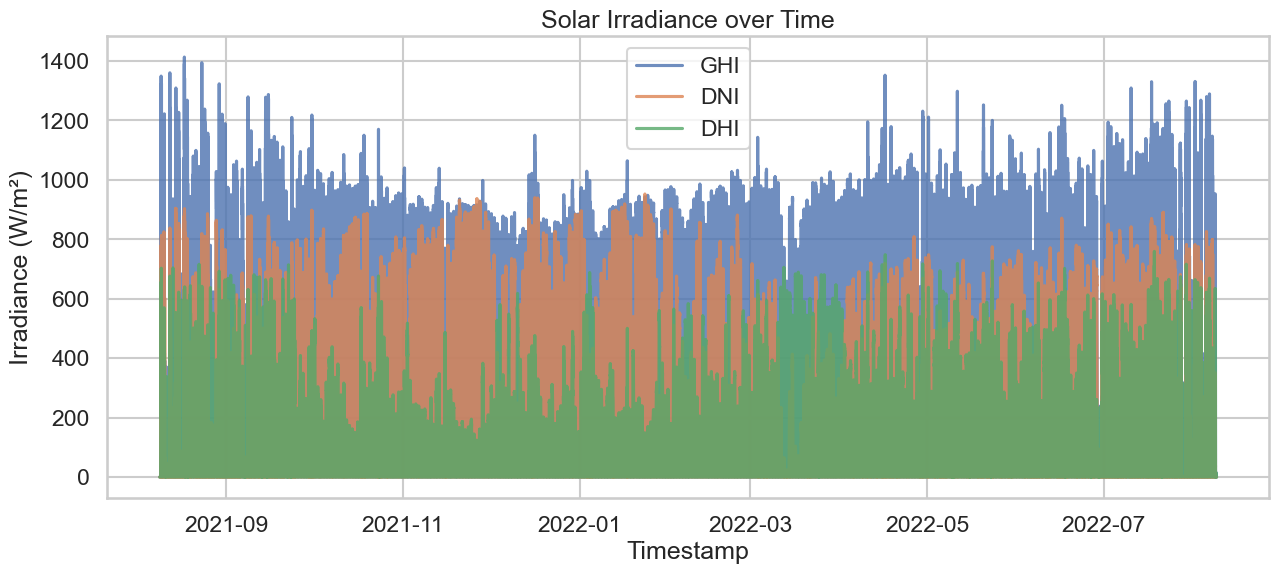

In [24]:
plt.figure(figsize=(15,6))
plt.plot(df.index, df['GHI'], label='GHI', alpha=0.8)
plt.plot(df.index, df['DNI'], label='DNI', alpha=0.8)
plt.plot(df.index, df['DHI'], label='DHI', alpha=0.8)
plt.title('Solar Irradiance over Time')
plt.xlabel('Timestamp')
plt.ylabel('Irradiance (W/m²)')
plt.legend()
plt.show()


##### Temperature (Tamb) over time

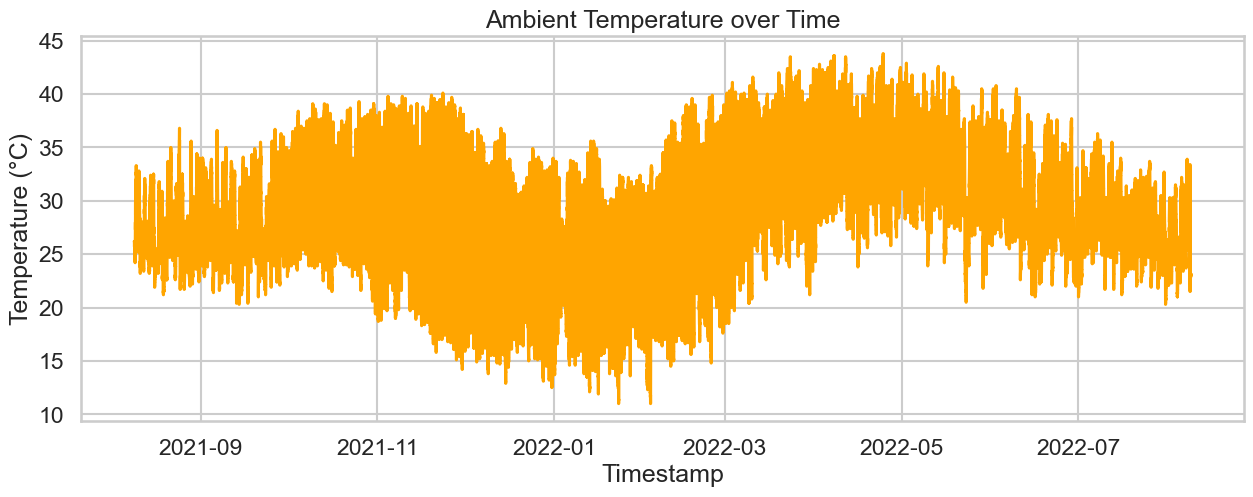

In [25]:
plt.figure(figsize=(15,5))
plt.plot(df.index, df['Tamb'], color='orange')
plt.title('Ambient Temperature over Time')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.show()


In [27]:
# # Optional: resample to daily mean to reduce number of bars
# df_daily = df.resample('D').mean()

# # Plot bar chart for each variable
# variables = ['GHI', 'DNI', 'DHI', 'Tamb']

# plt.figure(figsize=(18,8))
# for i, var in enumerate(variables, 1):
#     plt.subplot(4,1,i)
#     plt.bar(df_daily.index, df_daily[var], color='blue')
#     plt.title(f'{var} over Time')
#     plt.ylabel(var)
#     plt.xticks(rotation=45)
# plt.xlabel('Date')
# plt.tight_layout()
# plt.show()

##### Bar Chart – GHI

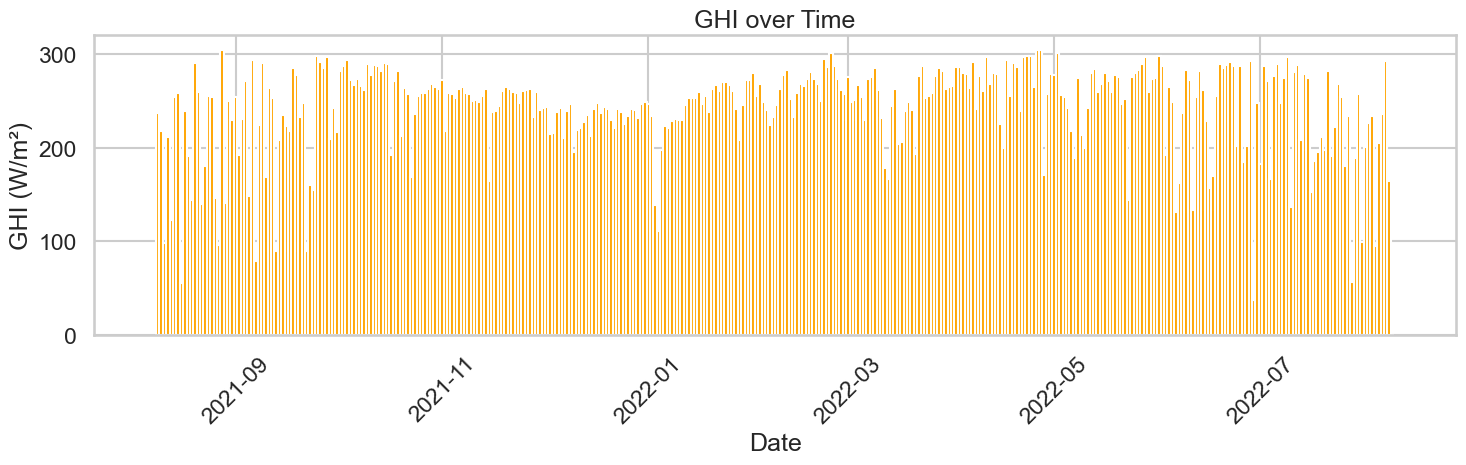

In [28]:
# Plot GHI
plt.figure(figsize=(15,5))
plt.bar(df_daily.index, df_daily['GHI'], color='orange', width=1.0)
plt.title('GHI over Time')
plt.xlabel('Date')
plt.ylabel('GHI (W/m²)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Bar Chart – DNI

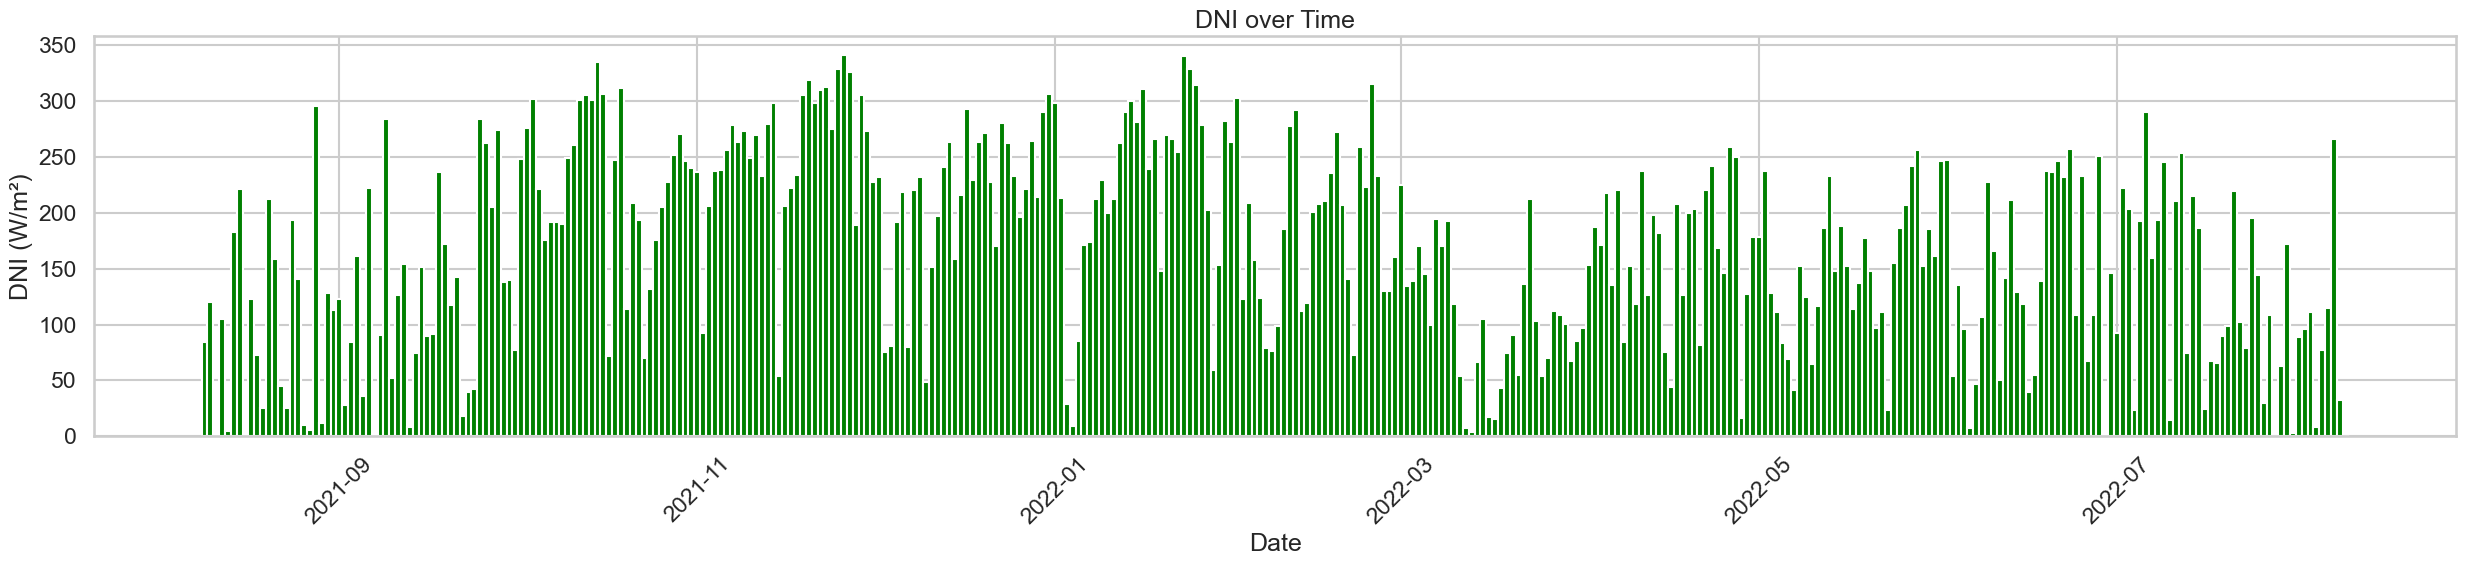

In [29]:
plt.figure(figsize=(25,6))
plt.bar(df_daily.index, df_daily['DNI'], color='green', width=1.0)
plt.title('DNI over Time')
plt.xlabel('Date')
plt.ylabel('DNI (W/m²)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### Bar Chart – DHI

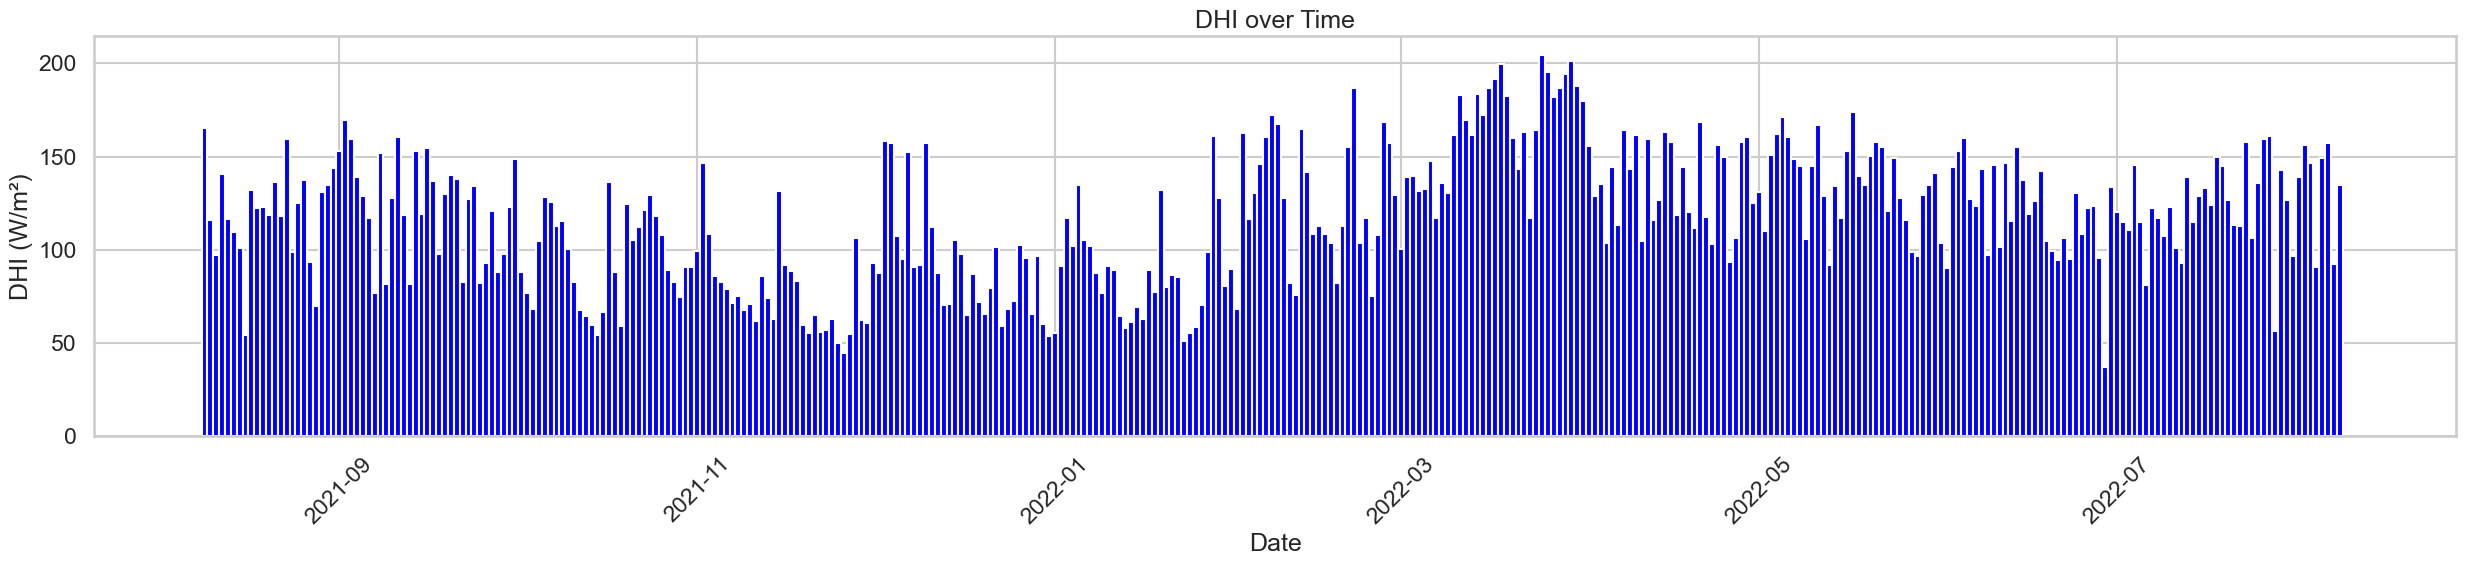

In [30]:
plt.figure(figsize=(25,6))
plt.bar(df_daily.index, df_daily['DHI'], color='blue', width=1.0)
plt.title('DHI over Time')
plt.xlabel('Date')
plt.ylabel('DHI (W/m²)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### Bar Chart – Tamb (Temperature)

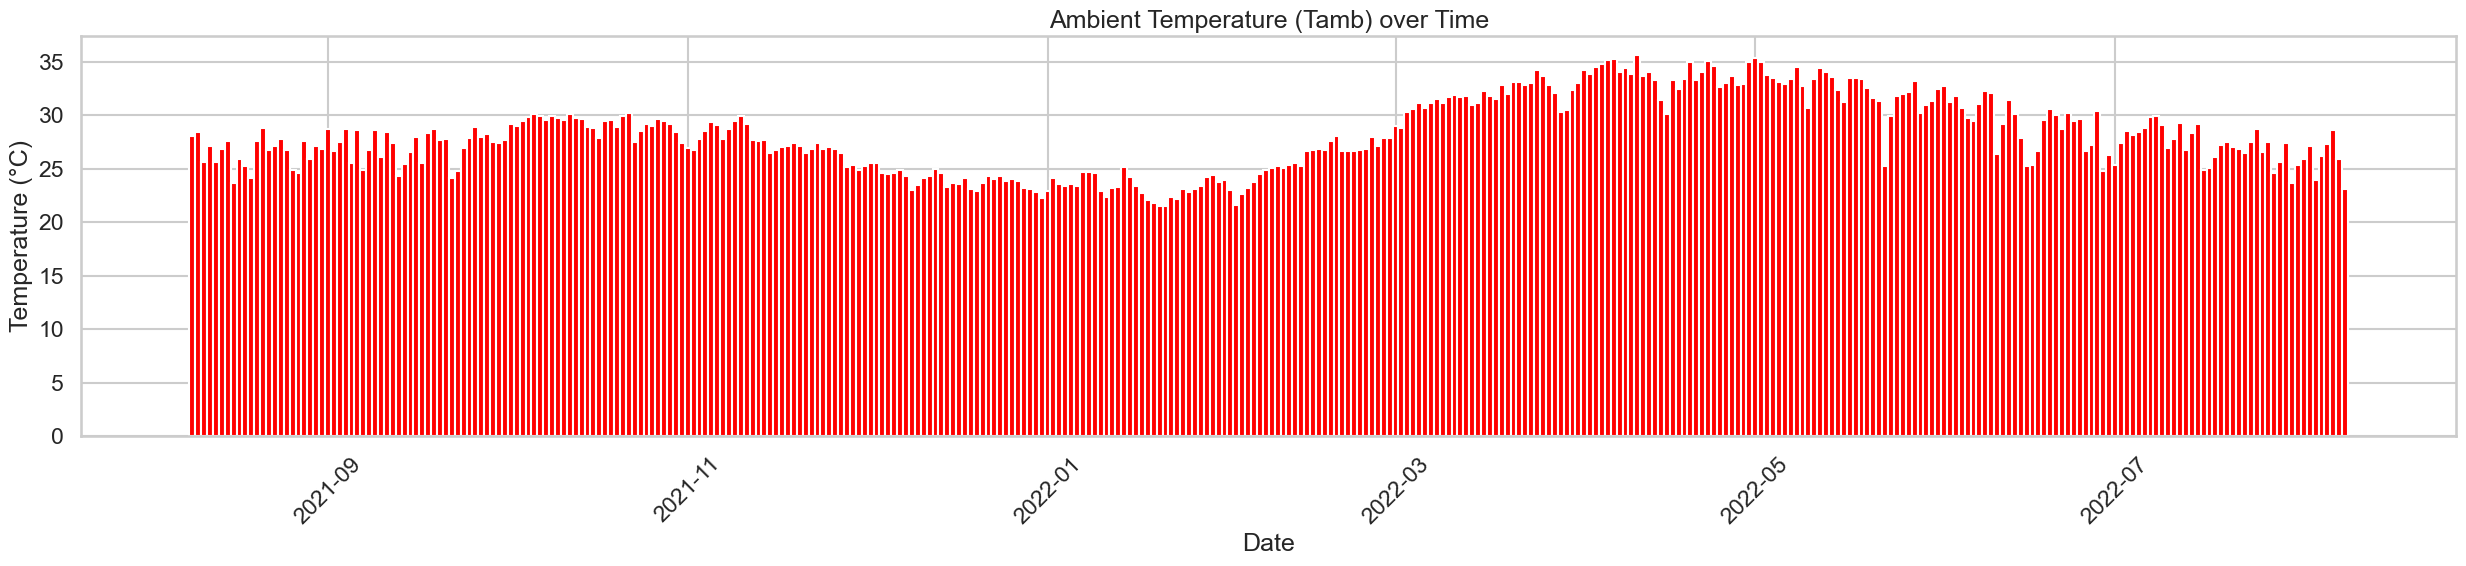

In [31]:
plt.figure(figsize=(25,6))
plt.bar(df_daily.index, df_daily['Tamb'], color='red', width=1.0)
plt.title('Ambient Temperature (Tamb) over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Check Cleaning Flag Values

In [32]:
# Check unique values in Cleaning column
df['Cleaning'].unique()


array([0, 1])

#### Group by Cleaning and compute average ModA & ModB

In [33]:
# Group by Cleaning flag and compute mean of ModA & ModB
cleaning_avg = df.groupby('Cleaning')[['ModA','ModB']].mean()
print(cleaning_avg)


                ModA        ModB
Cleaning                        
0         236.524253  228.816071
1         307.229278  301.972165


#### Plot Average ModA & ModB Pre/Post-Clean

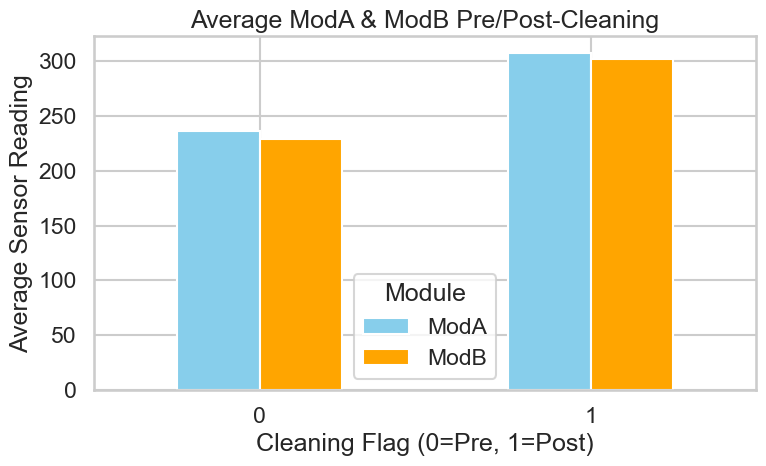

In [35]:
# import matplotlib.pyplot as plt

# Plot as bar chart
cleaning_avg.plot(kind='bar', figsize=(8,5), color=['skyblue','orange'])
plt.title('Average ModA & ModB Pre/Post-Cleaning')
plt.xlabel('Cleaning Flag (0=Pre, 1=Post)')
plt.ylabel('Average Sensor Reading')
plt.xticks(rotation=0)
plt.legend(title='Module')
plt.tight_layout()
plt.show()


## Correlation & Relationship Analysis

#### Heatmap of correlations

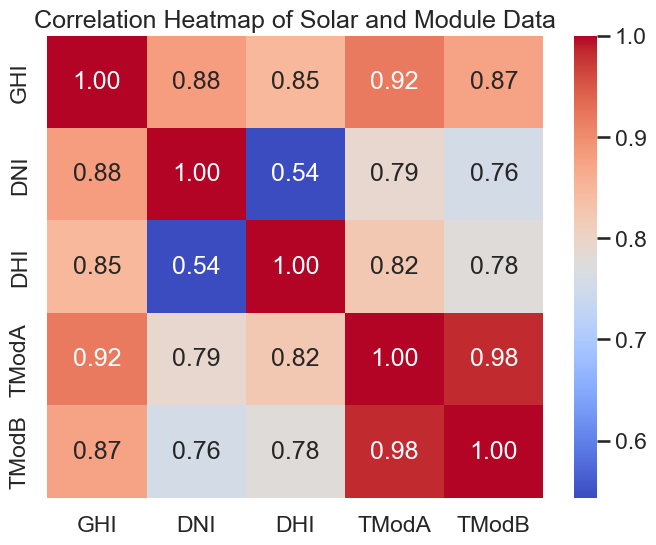

In [37]:
# Select relevant columns
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']

# Compute correlation matrix
corr_matrix = df[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Solar and Module Data')
plt.show()

#### Scatter plots

##### Wind variables vs GHI

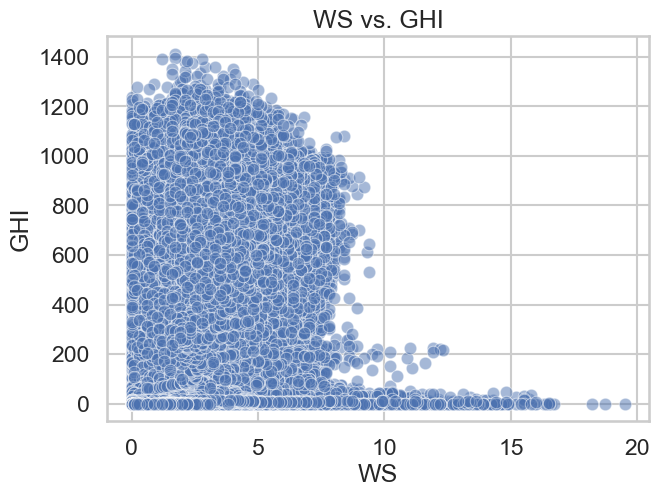

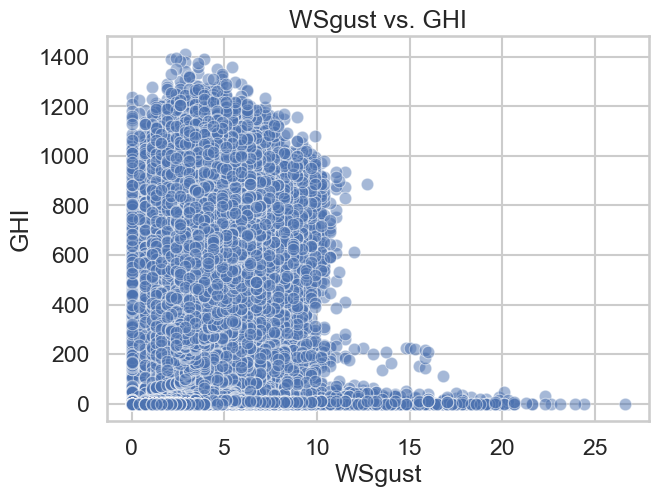

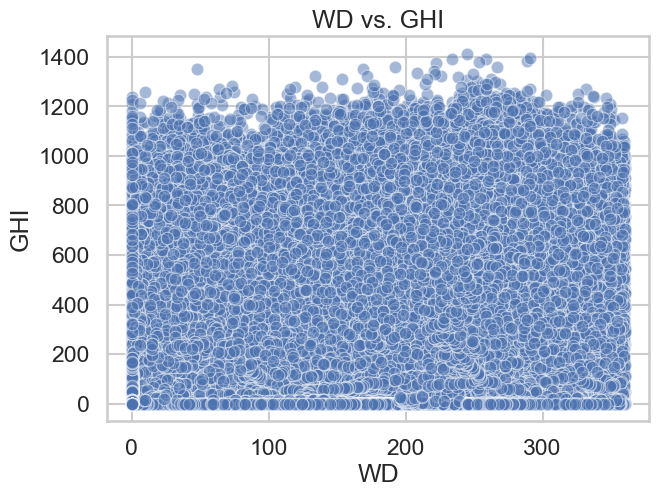

In [38]:
wind_cols = ['WS', 'WSgust', 'WD']

for col in wind_cols:
    plt.figure(figsize=(7,5))
    sns.scatterplot(data=df, x=col, y='GHI', alpha=0.5)
    plt.title(f'{col} vs. GHI')
    plt.xlabel(col)
    plt.ylabel('GHI')
    plt.show()


##### RH vs Tamb and RH vs GHI

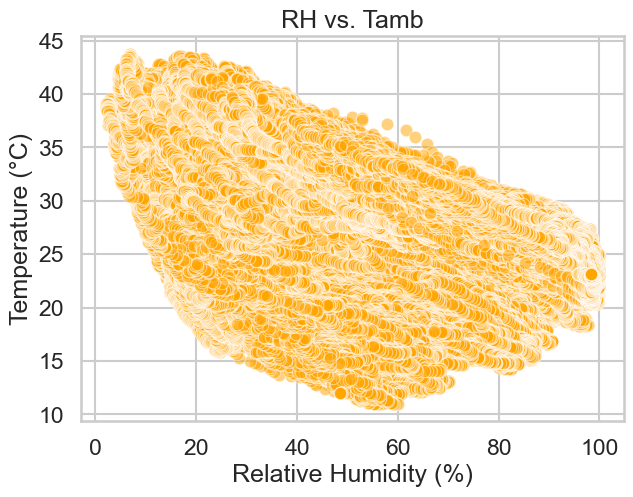

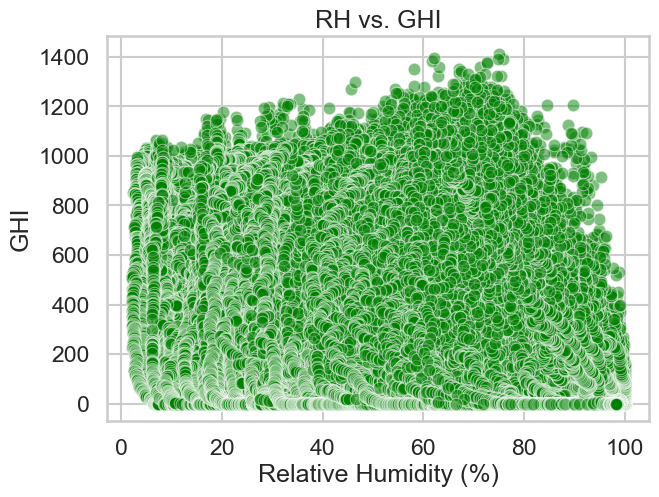

In [39]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='RH', y='Tamb', alpha=0.5, color='orange')
plt.title('RH vs. Tamb')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.show()

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='RH', y='GHI', alpha=0.5, color='green')
plt.title('RH vs. GHI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI')
plt.show()


## Wind & Distribution Analysis

##### Average Wind Speed by Wind Direction (Bar Chart)

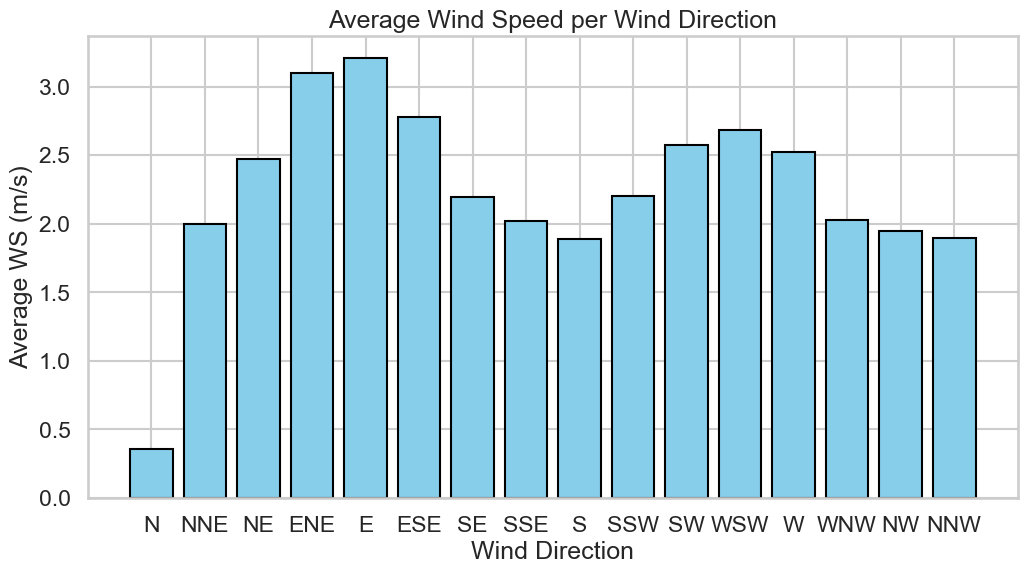

In [42]:

# Define wind direction bins (16 sectors)
bins = np.arange(0, 360 + 22.5, 22.5)
labels = ['N','NNE','NE','ENE','E','ESE','SE','SSE',
          'S','SSW','SW','WSW','W','WNW','NW','NNW']

# Assign each WD to a bin
wd_bins = np.digitize(df['WD'], bins) - 1  # 0-based index

# Compute average WS per wind direction
avg_ws_by_dir = [df['WS'][wd_bins == i].mean() for i in range(16)]

# Plot bar chart
plt.figure(figsize=(12,6))
plt.bar(labels, avg_ws_by_dir, color='skyblue', edgecolor='black')
plt.title('Average Wind Speed per Wind Direction')
plt.xlabel('Wind Direction')
plt.ylabel('Average WS (m/s)')
plt.show()


#### Histogram for GHI

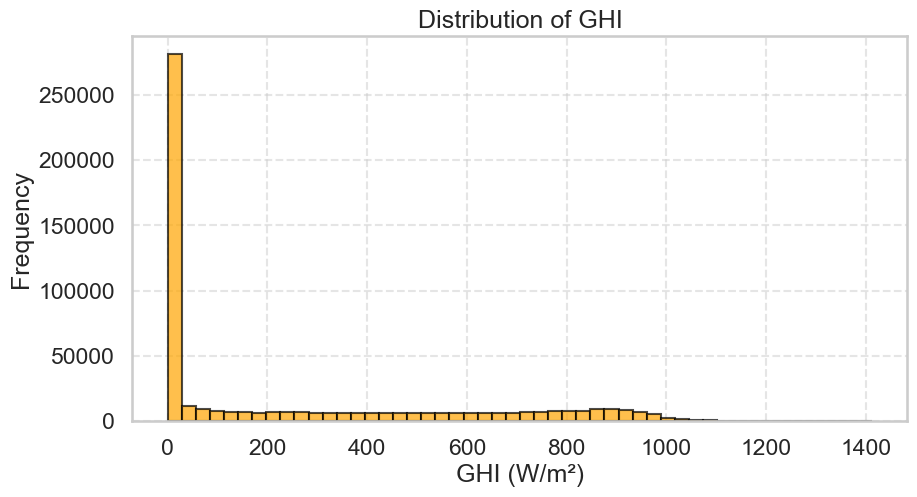

In [44]:

plt.figure(figsize=(10,5))
plt.hist(df['GHI'], bins=50, color='orange', edgecolor='black', alpha=0.7)
plt.title('Distribution of GHI')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


##### Histogram for WS (Wind Speed)

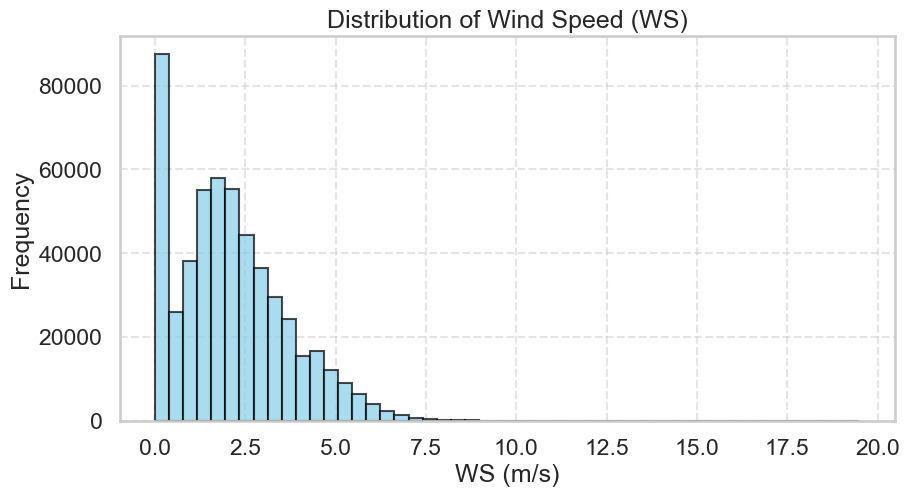

In [45]:
plt.figure(figsize=(10,5))
plt.hist(df['WS'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Wind Speed (WS)')
plt.xlabel('WS (m/s)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


### Temperature Analysis

##### Scatter Plot — RH vs Tamb

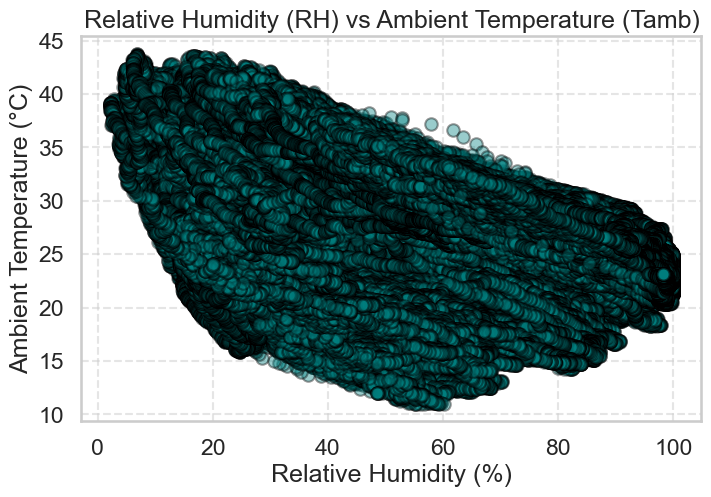

In [47]:


plt.figure(figsize=(8,5))
plt.scatter(df['RH'], df['Tamb'], alpha=0.4, color='teal', edgecolor='black')
plt.title('Relative Humidity (RH) vs Ambient Temperature (Tamb)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


##### Scatter Plot — RH vs GHI

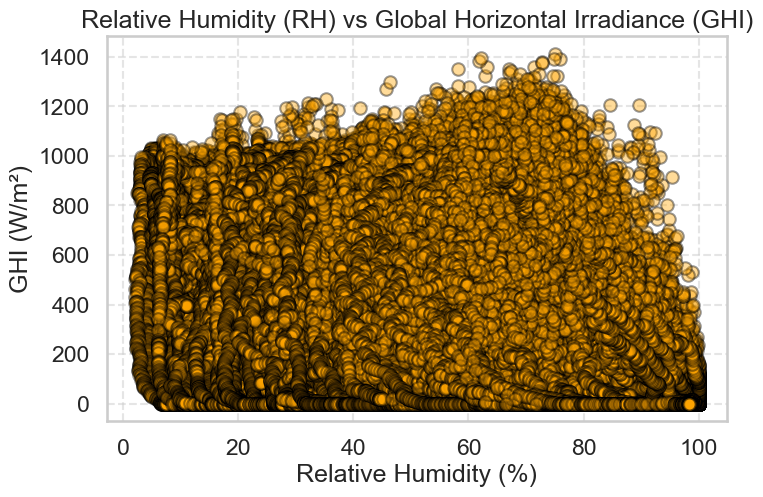

In [48]:
plt.figure(figsize=(8,5))
plt.scatter(df['RH'], df['GHI'], alpha=0.4, color='orange', edgecolor='black')
plt.title('Relative Humidity (RH) vs Global Horizontal Irradiance (GHI)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


##### Correlation Coefficients

###### check statistically whether RH actually correlates with Tamb or GHI.

In [49]:
corr_rh_tamb = df['RH'].corr(df['Tamb'])
corr_rh_ghi = df['RH'].corr(df['GHI'])

print(f"Correlation between RH and Tamb: {corr_rh_tamb:.3f}")
print(f"Correlation between RH and GHI: {corr_rh_ghi:.3f}")


Correlation between RH and Tamb: -0.415
Correlation between RH and GHI: -0.362


##### Bubble Chart — GHI vs. Tamb with Bubble Size = RH

##### Bubble Chart with RH (Relative Humidity) as Bubble Size

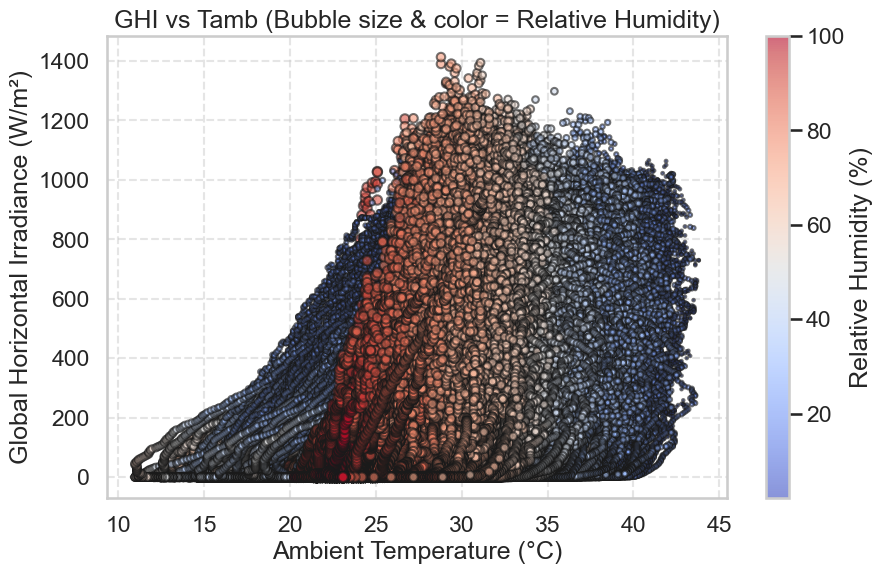

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Create scatter plot
plt.scatter(
    df['Tamb'],           # X-axis: Temperature
    df['GHI'],            # Y-axis: Solar radiation
    s=df['RH'] / 2,       # Bubble size scaled down for readability
    c=df['RH'],           # Bubble color represents humidity
    cmap='coolwarm',      # Blue = humid, Red = dry
    alpha=0.6, 
    edgecolor='k'
)

plt.title('GHI vs Tamb (Bubble size & color = Relative Humidity)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Global Horizontal Irradiance (W/m²)')
plt.colorbar(label='Relative Humidity (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


##### Use BP (Barometric Pressure) Instead of RH

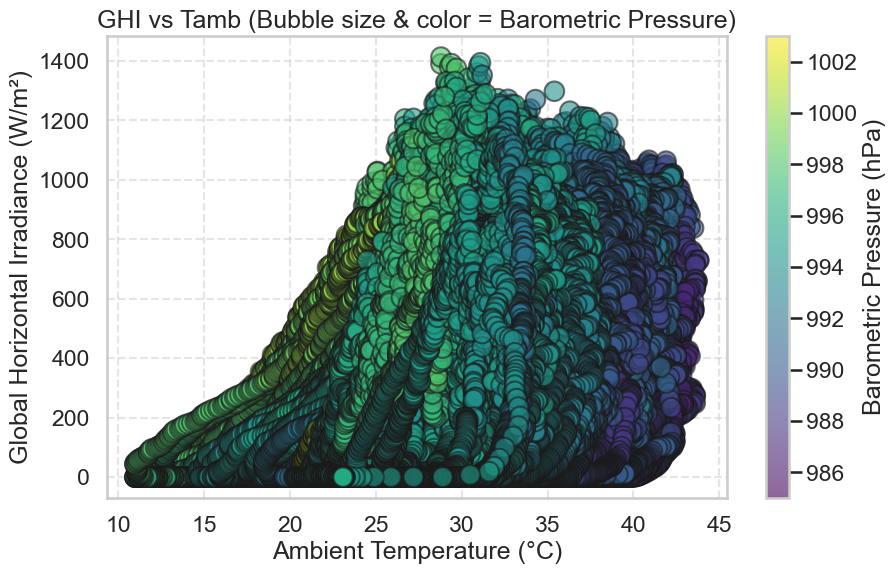

In [51]:
plt.figure(figsize=(10,6))
plt.scatter(
    df['Tamb'],
    df['GHI'],
    s=df['BP'] / 5,       # scaled bubble size
    c=df['BP'],
    cmap='viridis',
    alpha=0.6,
    edgecolor='k'
)

plt.title('GHI vs Tamb (Bubble size & color = Barometric Pressure)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Global Horizontal Irradiance (W/m²)')
plt.colorbar(label='Barometric Pressure (hPa)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
